In [271]:
# Importing the required libraries
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [272]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGenerator:
    def __init__(self, width, height, density):
        self.width = width
        self.height = height
        self.density = density
        self.grid = self.generate_random_maze()

    def generate_random_maze(self):
        maze = np.random.choice([0, 1], size=(self.height, self.width), p=[1-self.density, self.density])
        maze[0, 0] = 0  # Entrance
        maze[-1, -1] = 0  # Exit
        
        
   # Make the entrance and exit
        # Generate a random path from entrance to exit using random walk
        x, y = 0, 0
        while (x, y) != (self.width - 1, self.height - 1):
            directions = [(0, 1), (1, 0)]
            random.shuffle(directions)
            for dx, dy in directions:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.width and 0 <= ny < self.height:
                    #maze[ny, nx] = 0
                    x, y = nx, ny
                    break        
        
        return maze

    def display(self, start_positions, goal_positions, paths=None, animate=False):
        fig, ax = plt.subplots()
        ax.imshow(self.grid, cmap='binary')

        if isinstance(start_positions, list):
            # Mark the entrance and exit positions for each pair
            for i in range(len(start_positions)):
                ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    for i in range(len(start_positions)):
                        ax.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
                        ax.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')
                        path_x, path_y = zip(*paths[i][:frame+1])
                        ax.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
                        ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths[0]), interval=500)
                plt.show()
                return ani
        else:
            # Mark the entrance and exit positions
            ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
            ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

            if paths and animate:
                # Create a function to update the animation
                print('========test===========')
                def update(frame):
                    ax.clear()
                    ax.imshow(self.grid, cmap='binary')
                    ax.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
                    ax.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')
                    path_x, path_y = zip(*paths[:frame+1])
                    ax.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
                    ax.plot(path_y[-1], path_x[-1], color='blue', marker='*', markersize=10)  # Marker on the moving agent
                    #ax.legend()
                    ax.legend().set_visible(False)

                # Create the animation
                ani = FuncAnimation(fig, update, frames=len(paths), interval=250)
                plt.show()
                return ani
        plt.legend()
        plt.show()



    # def display(self, start_positions, goal_positions, paths=None):
    #     plt.imshow(self.grid, cmap='binary')

    #     if isinstance(start_positions, list):
    #         # Mark the entrance and exit positions for each pair
    #         for i in range(len(start_positions)):
    #             plt.scatter(start_positions[i][1], start_positions[i][0], color='red', marker='o', s=50, label='Start')
    #             plt.scatter(goal_positions[i][1], goal_positions[i][0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned paths for each pair
    #             for i in range(len(paths)):
    #                 path_x, path_y = zip(*paths[i])
    #                 plt.plot(path_y, path_x, marker='o', markersize=1, label=f'Path {i+1}')
    #     else:
    #         # Mark the entrance and exit positions
    #         plt.scatter(start_positions[1], start_positions[0], color='red', marker='o', s=50, label='Start')
    #         plt.scatter(goal_positions[1], goal_positions[0], color='green', marker='o', s=50, label='Goal')

    #         if paths:
    #             # Plot the learned path
    #             path_x, path_y = zip(*paths)
    #             plt.plot(path_y, path_x, marker='o', color='blue', markersize=1, label='Learned Path')
    #     plt.legend()
    #     plt.show()







In [273]:
# Create a maze generator instance
# Define the dimensions of the maze
width = 12
height = 12

# Define the density of walls in the maze (between 0 and 1)
density = 0.15
maze_generator = MazeGenerator(width, height, density)

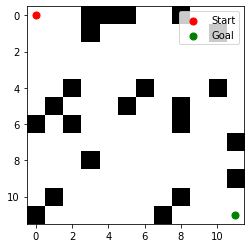

In [274]:


# Specify the starting and goal positions
startPos = (0,0)
goalPos = (width-1,height-1)

# Display the generated maze as a figure with starting and goal positions
maze_generator.display(startPos, goalPos)

In [276]:
import numpy as np

class QLearningMazeSolver:
    def __init__(self, maze, startPos, goalPos, alpha=0.1, gamma=1, epsilon=0.1, epochs=6000):
        self.maze = maze
        self.startPos = startPos
        self.goalPos = goalPos
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epochs = epochs  # Number of episodes
        self.height, self.width = maze.shape  # Get maze dimensions
        self.q_table = np.zeros((self.height, self.width, 4))  # Q-table: 4 possible actions (up, down, left, right)
        self.Maxtstep_final = 1000
        self.MAX_STEP = 10000
        


    def greedy_policy(self, state):
        q_values = self.q_table[state[0], state[1]]
        max_q_value = np.max(q_values)
        # Find indices of actions with maximum Q-value
        greedy_actions = [i for i, q_value in enumerate(
            q_values) if q_value == max_q_value]
        # If there are multiple greedy actions, randomly select one
        action = np.random.choice(greedy_actions)
        #action = np.argmax(q_values)
        return action

    def eps_greedy_policy(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.randint(0, 4)  # Random action (exploration)
        else:
            return self.greedy_policy(state)


    def choose_action(self, state):
        return self.eps_greedy_policy(state)

    def update_q_table(self, state, action, reward, next_state):
        self.q_table[state[0], state[1], action] += self.alpha * (reward + self.gamma * np.max(self.q_table[next_state[0], next_state[1]]) - self.q_table[state[0], state[1], action])

    def solve_maze(self):
        episode_steps = []
        for ep in range(self.epochs):
            state = self.startPos
            steps = 0  # Variable to store steps in current episode
            while state != self.goalPos:
                action = self.choose_action(state) # behavior policy
                next_state, reward = self.take_action(state, action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                steps = steps + 1
                if steps == self.MAX_STEP:
                    print("Max_Step {} reached".format(self.MAX_STEP))
            if ep % 100 == 0:
                print('episod = {}'.format(ep))
                print('steps = {}'.format(steps))
            episode_steps.append(steps)  # Save total steps for the current episode
                
        return episode_steps

    def take_action(self, state, action):
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Possible actions: up, down, left, right
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])      
        
        # If next position is a wall or outside grid boundaries, set reward to -2
        if next_state[0] == -1 or next_state[0] == self.height  or next_state[1] == -1 or next_state[1] == self.width:
            reward = -2
            next_state = state
        elif self.maze[next_state[0], next_state[1]] == 1:
            reward = -2
            next_state = state            
        elif next_state == self.goalPos:
            reward = 10  # Reward: 10 for reaching the goal
        else:
            reward = -1  # Reward: -1 for every other movement
        
        return next_state, reward


    def get_path(self):
        path = [self.startPos]
        state = self.startPos
        step = 0
        while state != self.goalPos:
            step += 1
            next_state, _ = self.take_action(state, self.greedy_policy(state))
            path.append(next_state)
            state = next_state
            if step == self.Maxtstep_final:
                print("Max_Step {} reached".format(self.Maxtstep_final))
        return path

# Example usage:
solver = QLearningMazeSolver(maze_generator.grid, startPos, goalPos)
episode_steps = solver.solve_maze()


episod = 0
steps = 798
episod = 100
steps = 47
episod = 200
steps = 44
episod = 300
steps = 28
episod = 400
steps = 26
episod = 500
steps = 24
episod = 600
steps = 27
episod = 700
steps = 24
episod = 800
steps = 24
episod = 900
steps = 24
episod = 1000
steps = 25
episod = 1100
steps = 27
episod = 1200
steps = 24
episod = 1300
steps = 22
episod = 1400
steps = 24
episod = 1500
steps = 23
episod = 1600
steps = 30
episod = 1700
steps = 24
episod = 1800
steps = 24
episod = 1900
steps = 26
episod = 2000
steps = 26
episod = 2100
steps = 24
episod = 2200
steps = 26
episod = 2300
steps = 25
episod = 2400
steps = 25
episod = 2500
steps = 22
episod = 2600
steps = 24
episod = 2700
steps = 25
episod = 2800
steps = 23
episod = 2900
steps = 22
episod = 3000
steps = 24
episod = 3100
steps = 24
episod = 3200
steps = 22
episod = 3300
steps = 22
episod = 3400
steps = 22
episod = 3500
steps = 28
episod = 3600
steps = 22
episod = 3700
steps = 26
episod = 3800
steps = 22
episod = 3900
steps = 23
episod = 40

Text(0, 0.5, 'steps')

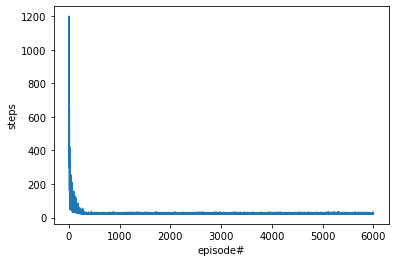

In [277]:
plt.plot(episode_steps[0:6000])
plt.xlabel('episode#')
plt.ylabel('steps')

========test===========


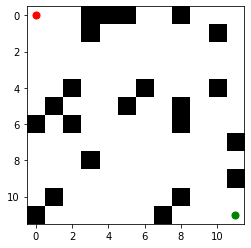

In [278]:
path = solver.get_path()
# Display the maze with the learned path
ani = maze_generator.display(startPos, goalPos, path, animate=True)
ani.save('test.gif', writer='pillow')

In [475]:
class QLearningMazeSolverMultiAgent:
    def __init__(self, maze, startPositions, goalPositions, alpha=0.1, gamma=1, epsilon=0.1, epochs=20000):
        self.maze = maze
        self.startPos = startPositions
        self.goalPos = goalPositions
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.epochs = epochs  # Number of episodes
        self.height, self.width = maze.shape  # Get maze dimensions
        self.num_agents = len(startPositions)
        self.q_tables = [np.zeros((self.height, self.width, 5)) for _ in range(self.num_agents)]  # Q-tables for each agent
        self.MAX_STEPS = 10000
        self.MAX_STEPS_final = 500


    def greedy_policy(self, state, agent_id):
        q_values = self.q_tables[agent_id][state[0], state[1]]
        max_q_value = np.max(q_values)
        # Find indices of actions with maximum Q-value
        greedy_actions = [i for i, q_value in enumerate(
            q_values) if q_value == max_q_value]
        # If there are multiple greedy actions, randomly select one
        action = np.random.choice(greedy_actions)
        #action = np.argmax(q_values)
        return action

    def eps_greedy_policy(self, state, agent_id, epsilon=None):
        if epsilon:
            eps_greedy = epsilon
        else:
            eps_greedy = self.epsilon
        if np.random.uniform(0, 1) < eps_greedy:
            return np.random.randint(0, 5)  # Random action (exploration)
        else:
            return self.greedy_policy(state, agent_id)


    def choose_action(self, state, agent_id):
        return self.eps_greedy_policy(state, agent_id)

    def update_q_table(self, state, action, reward, next_state, agent_id):
        self.q_tables[agent_id][state[0], state[1], action] += self.alpha * (
            reward + self.gamma * np.max(self.q_tables[agent_id][next_state[0], next_state[1]]) - self.q_tables[agent_id][state[0], state[1], action]
        )

    def solve_maze(self):
        episode_steps = []
        for ep in range(self.epochs):
            total_steps = 0
            agents_at_goals = np.zeros((self.num_agents,1))  # Keep track of agents at their respective goals
            total_steps = 0
            state = self.startPos.copy()
            while total_steps <= self.MAX_STEPS:
                total_steps += 1
                next_state = state.copy()  # Make a copy of the current state
                for agent_id in range(self.num_agents):
                    # Check if the agent reached its goal
                    if state[agent_id] == self.goalPos[agent_id]:
                       agents_at_goals[agent_id] = 1
                    else:
                        action = self.choose_action(state[agent_id], agent_id)
                        next_state, reward = self.take_action(state, action, agent_id)
                        #print('====================')
                        #print(next_state[agent_id])
                        self.update_q_table(state[agent_id], action, reward, next_state[agent_id], agent_id)
                        state = next_state
                                        
                # Check if all agents reached their goals
                if np.sum(agents_at_goals) == len(self.startPos):
                    #print(f"Episode {ep}: All agents reached their goals.")
                    break  # Stop the episode if all agents reached their goals
                    
            if ep % 200 == 0:
                print('episode = {}, total_steps = {}'.format(ep, total_steps))

            episode_steps.append(total_steps)  # Save total steps for the current episode        
                
        return episode_steps

    def take_action(self, state, action, agent_id):
        actions = [(0, -1), (0, 1), (-1, 0), (1, 0), (0,0)]  # Possible actions: up, down, left, right
        next_state = state.copy()
        next_state[agent_id] = (state[agent_id][0] + actions[action][0], state[agent_id][1] + actions[action][1])
        
        # Ensure next state is within grid boundaries
        next_state[agent_id] = (max(0, min(self.height - 1, next_state[agent_id][0])),
                    max(0, min(self.width - 1, next_state[agent_id][1])))        
        
        reward = 0
        # if state[agent_id] == self.goalPos[agent_id]:
        #     if next_state[agent_id] == self.goalPos[agent_id]:
        #         reward += 0
        #     else:
        #         reward += -100
        
        if  self.maze[next_state[agent_id][0], next_state[agent_id][1]] == 1:  # If next position is a wall, keep the next state the same as the current state
            next_state[agent_id] = state[agent_id]
            reward += -1
        elif any(next_state[agent_id] == state[i] for i in range(len(state)) if i != agent_id):
            next_state[agent_id] = state[agent_id]
            reward += -10
        elif next_state[agent_id] == self.goalPos[agent_id]:
            if state[agent_id] == self.goalPos[agent_id]:
                reward += 0
            else:
                reward += 10  # Reward: 10 for reaching the goal
            done = True  # Episode terminates
        else:   
            reward += -1  # Reward: -1 for every movement
            done = False  # Episode continues

        if state[agent_id] == self.goalPos[agent_id]: # do nothing if reach the goal
            reward = 0
            next_state[agent_id] = state[agent_id]
        
        return next_state, reward

    def get_paths(self):
        paths = [[] for _ in range(self.num_agents)]  # Initialize empty paths for each agent
        states = self.startPos[:]  # Initialize states for each agent
        for agent_id in range(self.num_agents):
            paths[agent_id].append(states[agent_id])
        # Continue until all agents reach their goals
        steps = 0
        use_eps_greedy = False
        while not all(state == goal for state, goal in zip(states, self.goalPos)):
            steps += 1
            state_change = np.zeros((self.num_agents,1))
            for agent_id in range(self.num_agents):
                if use_eps_greedy:
                    action = self.eps_greedy_policy(states[agent_id], agent_id)  # Choose action for the agent
                else:
                     action = self.greedy_policy(states[agent_id], agent_id)  # Choose action for the agent
                next_state, _ = self.take_action(states, action, agent_id)  # Take action
                paths[agent_id].append(next_state[agent_id])  # Append next state to the path
                if not next_state[agent_id] == states[agent_id]:
                    state_change[agent_id] = 1
                states = next_state  # Update state for the next iteration

            if np.sum(state_change) == 0:
                use_eps_greedy = True


            if steps == self.MAX_STEPS_final:
                print('max steps reached')
                break
        
        return paths





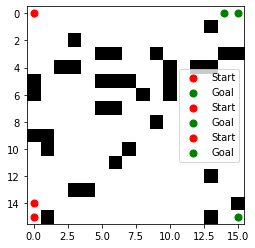

In [297]:
# Create a maze generator instance
# Define the dmensions of the maze
width = 16
height = 16

# Define the density of walls in the maze (between 0 and 1)
density = 0.15
maze_generator = MazeGenerator(width, height, density)
# Define start and goal positions for each agent


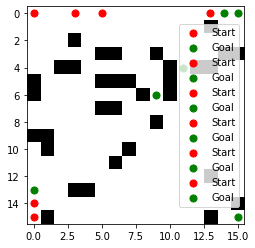

In [476]:
startPositions = [(0, 0), (width-1, 0), (width-2, 0), (0, height-3), (0,3), (0,5)]
goalPositions = [(height-1, width-1), (0, height-1), (0, height-2), (height-3,0),(4,11),(6,9)]
# goalPositions = [(4, 4),  (0, height-1), (0, height-2), (height-3,0),(4,11),(6,9)]
maze_generator.display(startPositions, goalPositions)

In [477]:


# Create an instance of the solver
solver = QLearningMazeSolverMultiAgent(maze_generator.grid, startPositions, goalPositions, epochs=10000)

# Solve the maze
episode_steps = solver.solve_maze()

episode = 0, total_steps = 4350
episode = 200, total_steps = 122
episode = 400, total_steps = 177
episode = 600, total_steps = 49
episode = 800, total_steps = 40
episode = 1000, total_steps = 35
episode = 1200, total_steps = 35
episode = 1400, total_steps = 39
episode = 1600, total_steps = 38
episode = 1800, total_steps = 44
episode = 2000, total_steps = 39
episode = 2200, total_steps = 46
episode = 2400, total_steps = 37
episode = 2600, total_steps = 37
episode = 2800, total_steps = 38
episode = 3000, total_steps = 48
episode = 3200, total_steps = 37
episode = 3400, total_steps = 48
episode = 3600, total_steps = 51
episode = 3800, total_steps = 41
episode = 4000, total_steps = 41
episode = 4200, total_steps = 37
episode = 4400, total_steps = 38
episode = 4600, total_steps = 42
episode = 4800, total_steps = 49
episode = 5000, total_steps = 39
episode = 5200, total_steps = 55
episode = 5400, total_steps = 37
episode = 5600, total_steps = 40
episode = 5800, total_steps = 38
episode = 600

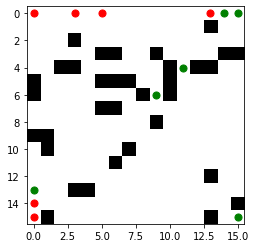

In [478]:
path = solver.get_paths()
ani = maze_generator.display(startPositions, goalPositions, path, animate=True)
ani.save('test.gif', writer='pillow')